In [1]:
import pandas as pd
df = pd.read_csv("D:\\Data science\\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [2]:
list(df)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [3]:
df.shape

(400, 11)

In [4]:
df[df.values==0.0]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes
16,7.58,118,32,0,284,110,Good,63,13,Yes,No
18,13.91,110,110,0,408,68,Good,46,17,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
379,5.81,125,111,0,404,107,Bad,54,15,Yes,No
383,9.35,98,117,0,76,68,Medium,63,10,Yes,No
386,5.32,152,116,0,170,160,Medium,39,16,Yes,No
391,6.10,153,63,0,49,124,Bad,56,16,Yes,No


In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 11)

In [8]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
df['Sales'].max()

16.27

In [12]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [13]:
categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [14]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

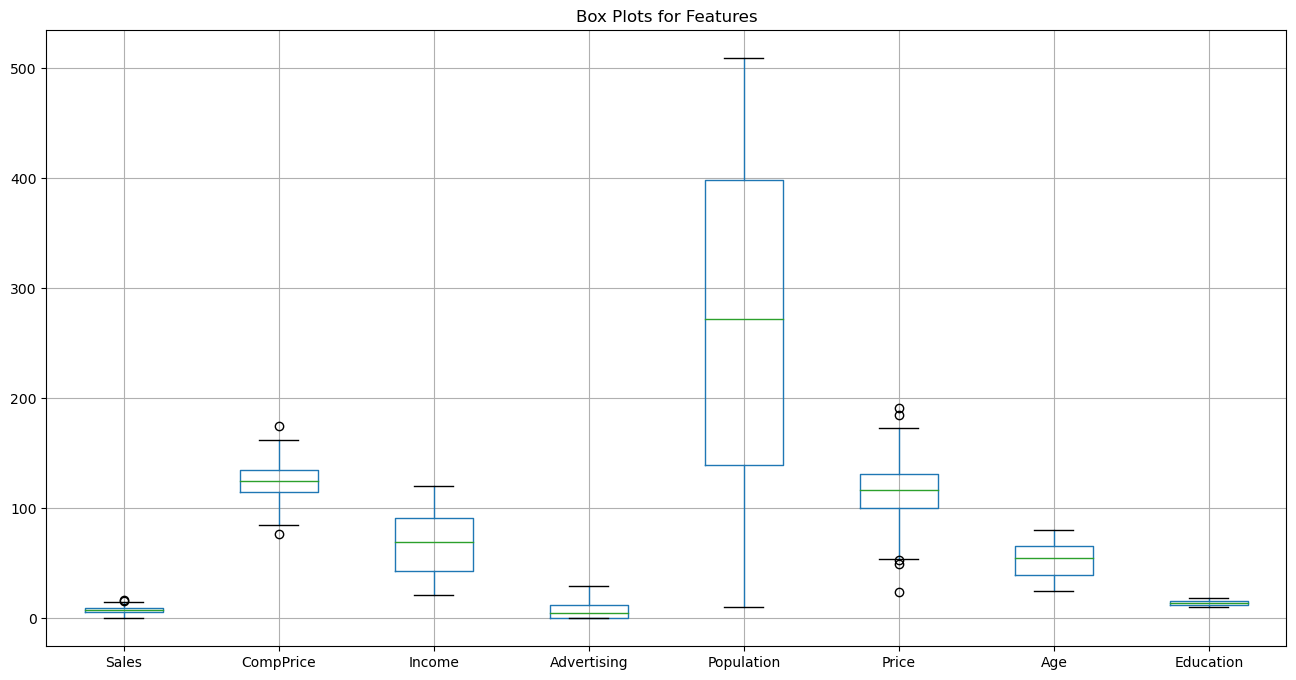

In [15]:
# Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
df.boxplot()
plt.title("Box Plots for Features")
plt.show()

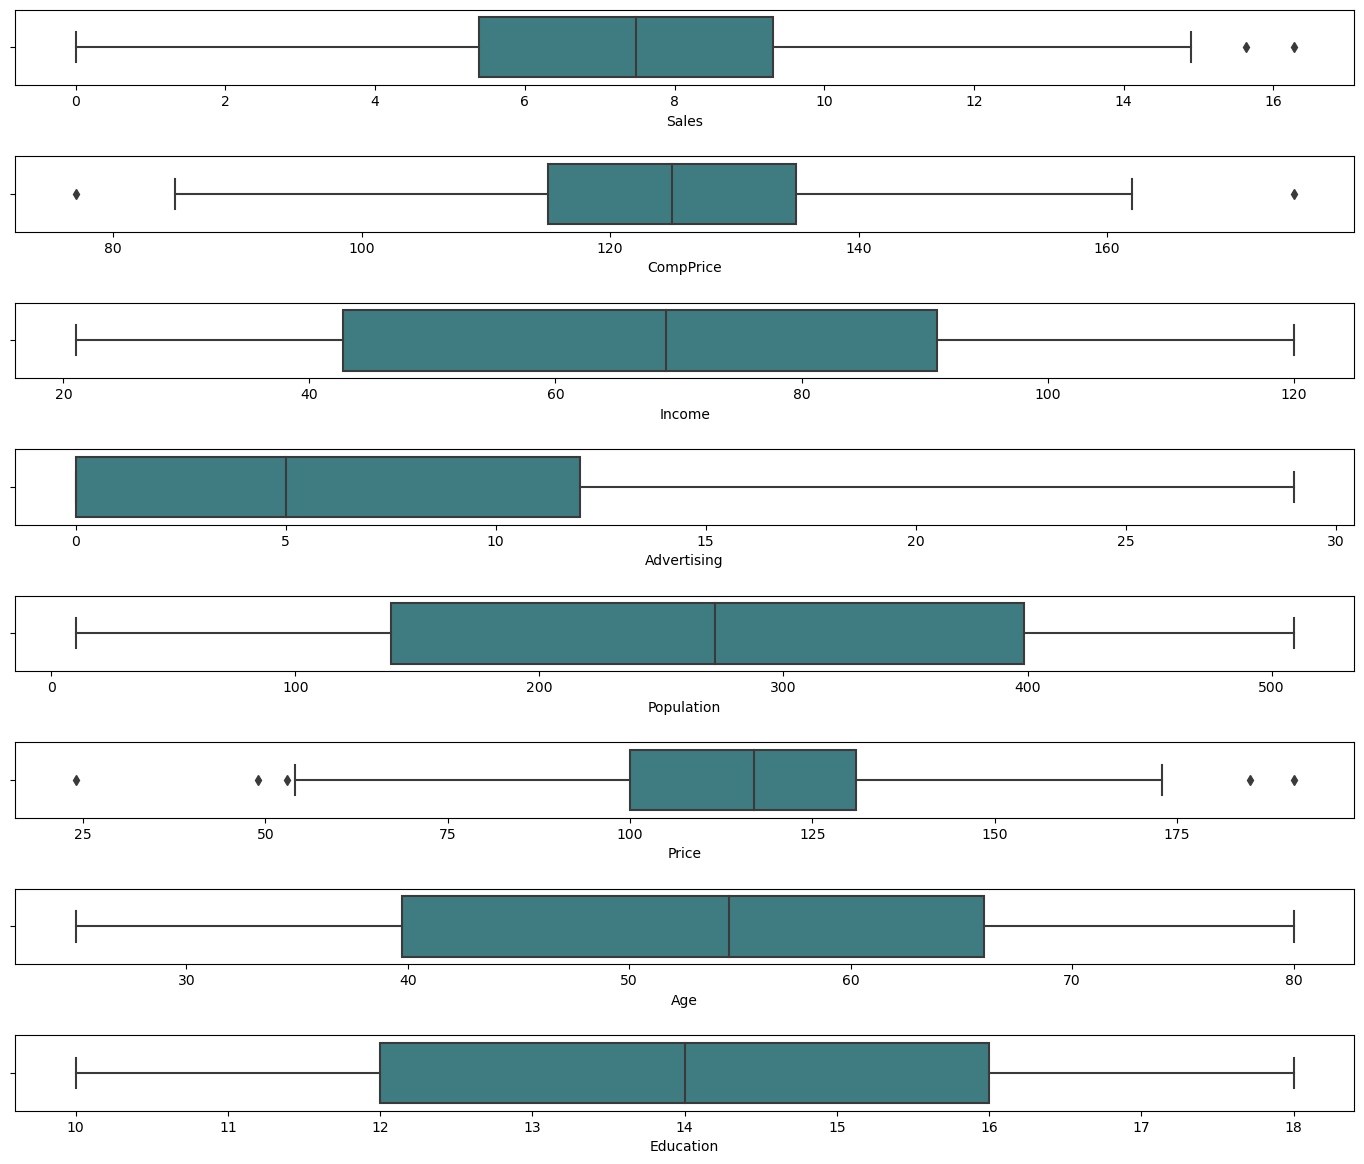

In [16]:
ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

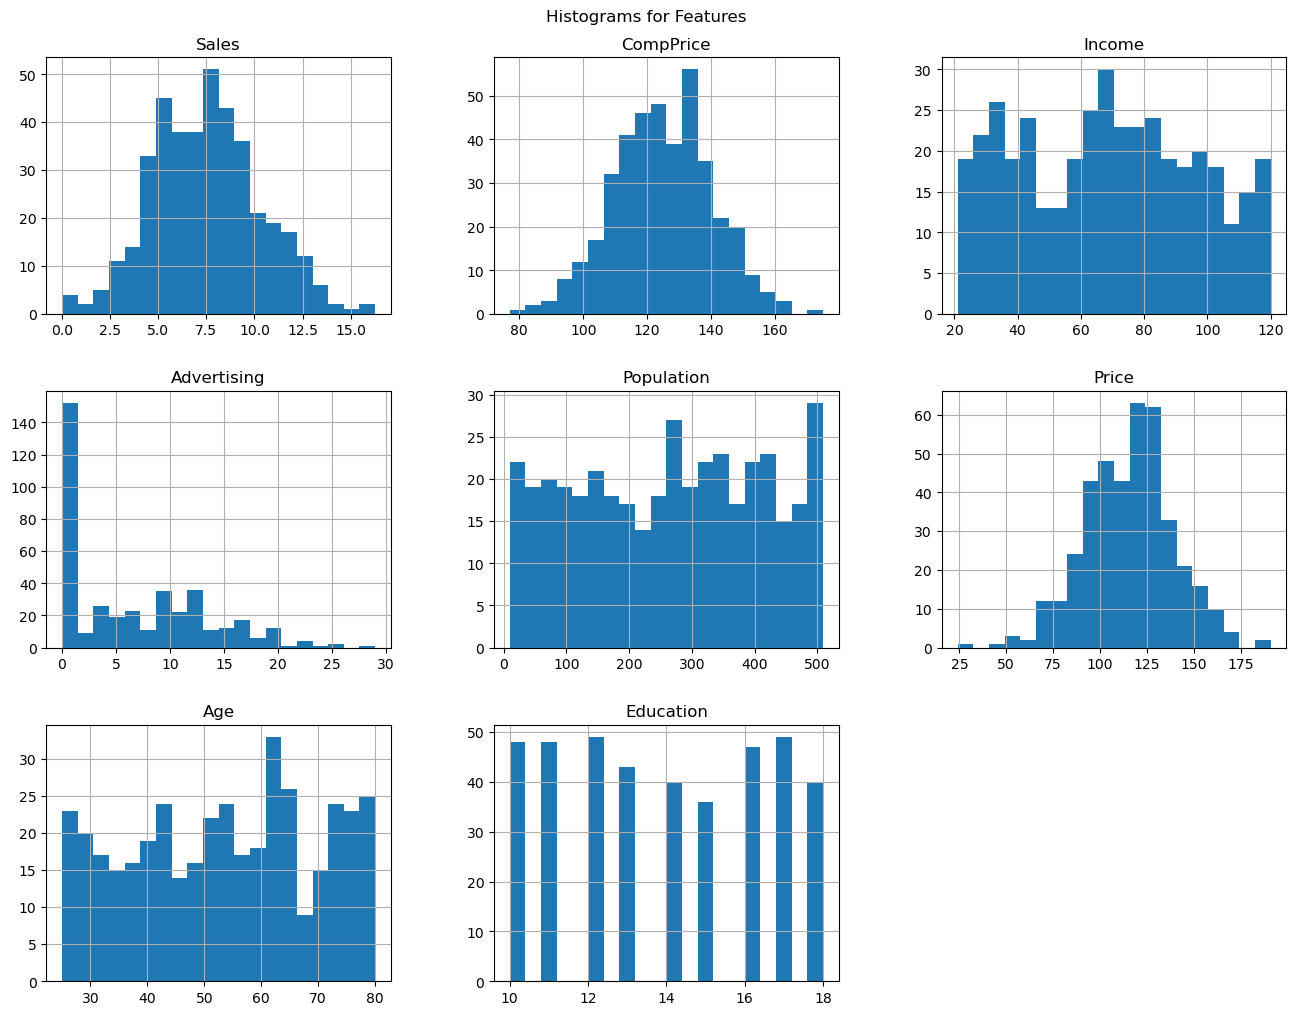

In [17]:
# Histograms for features
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms for Features", y=0.92)
plt.show()

<Figure size 800x800 with 0 Axes>

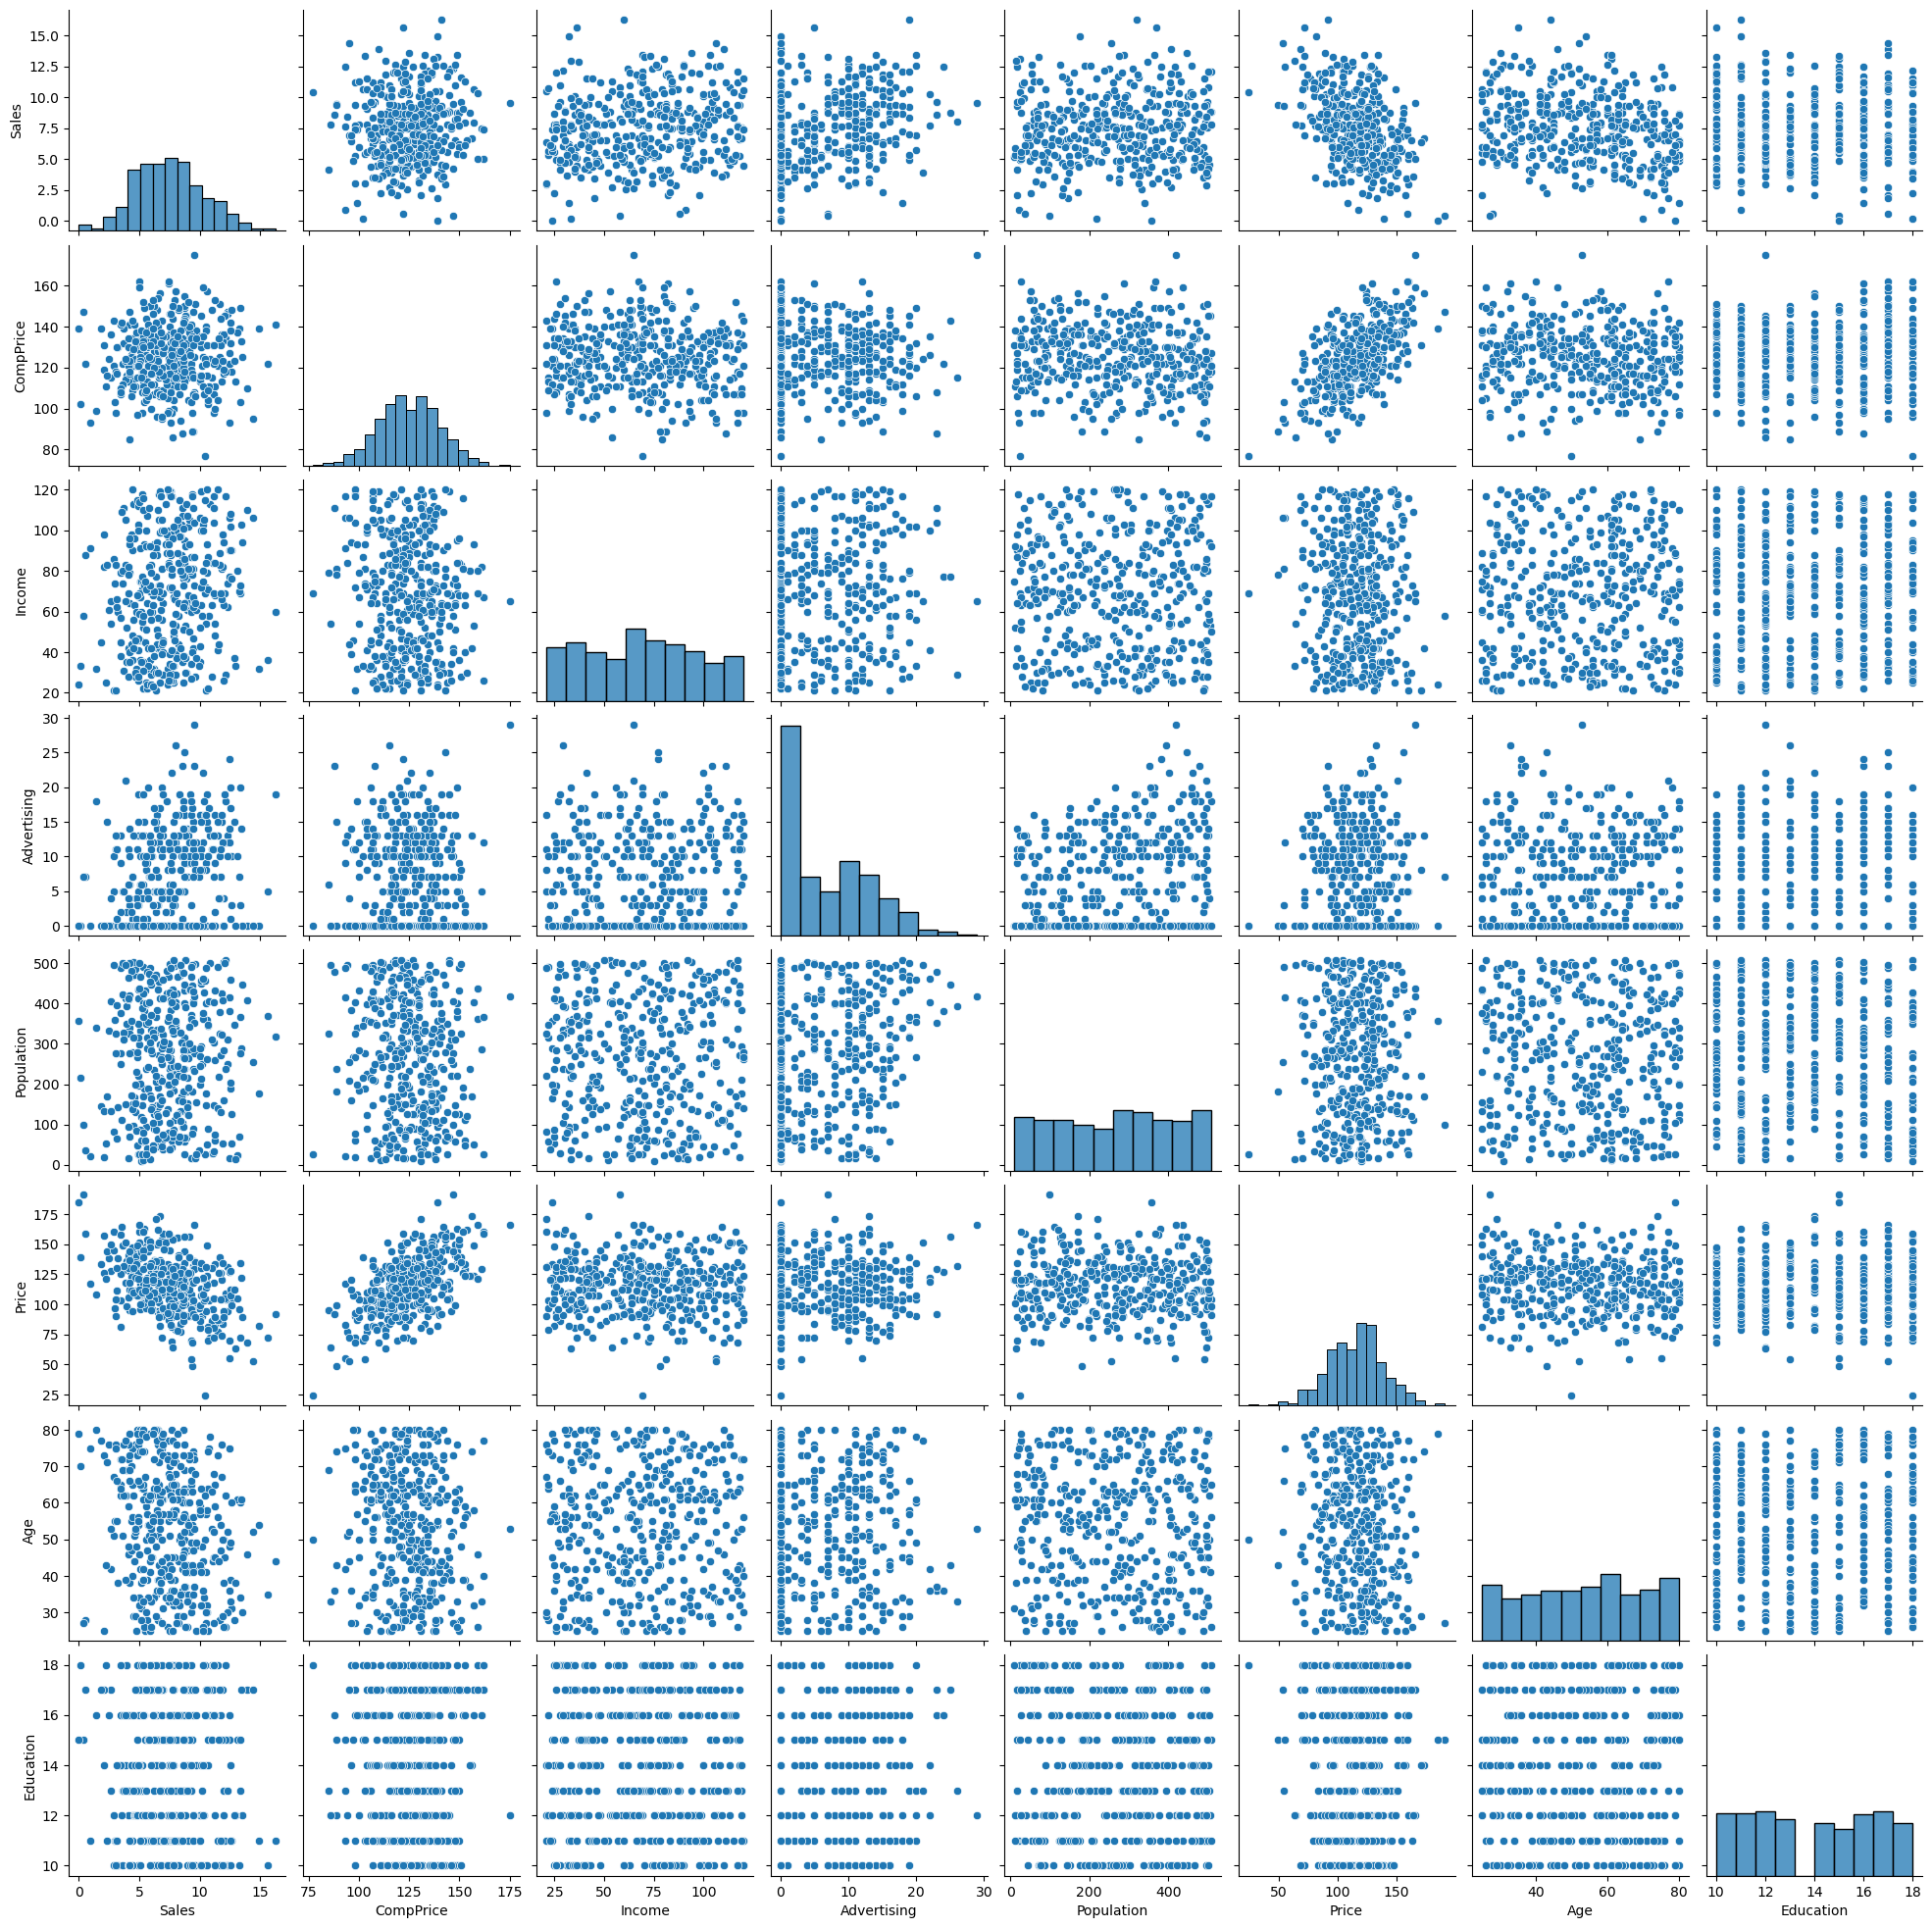

In [18]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

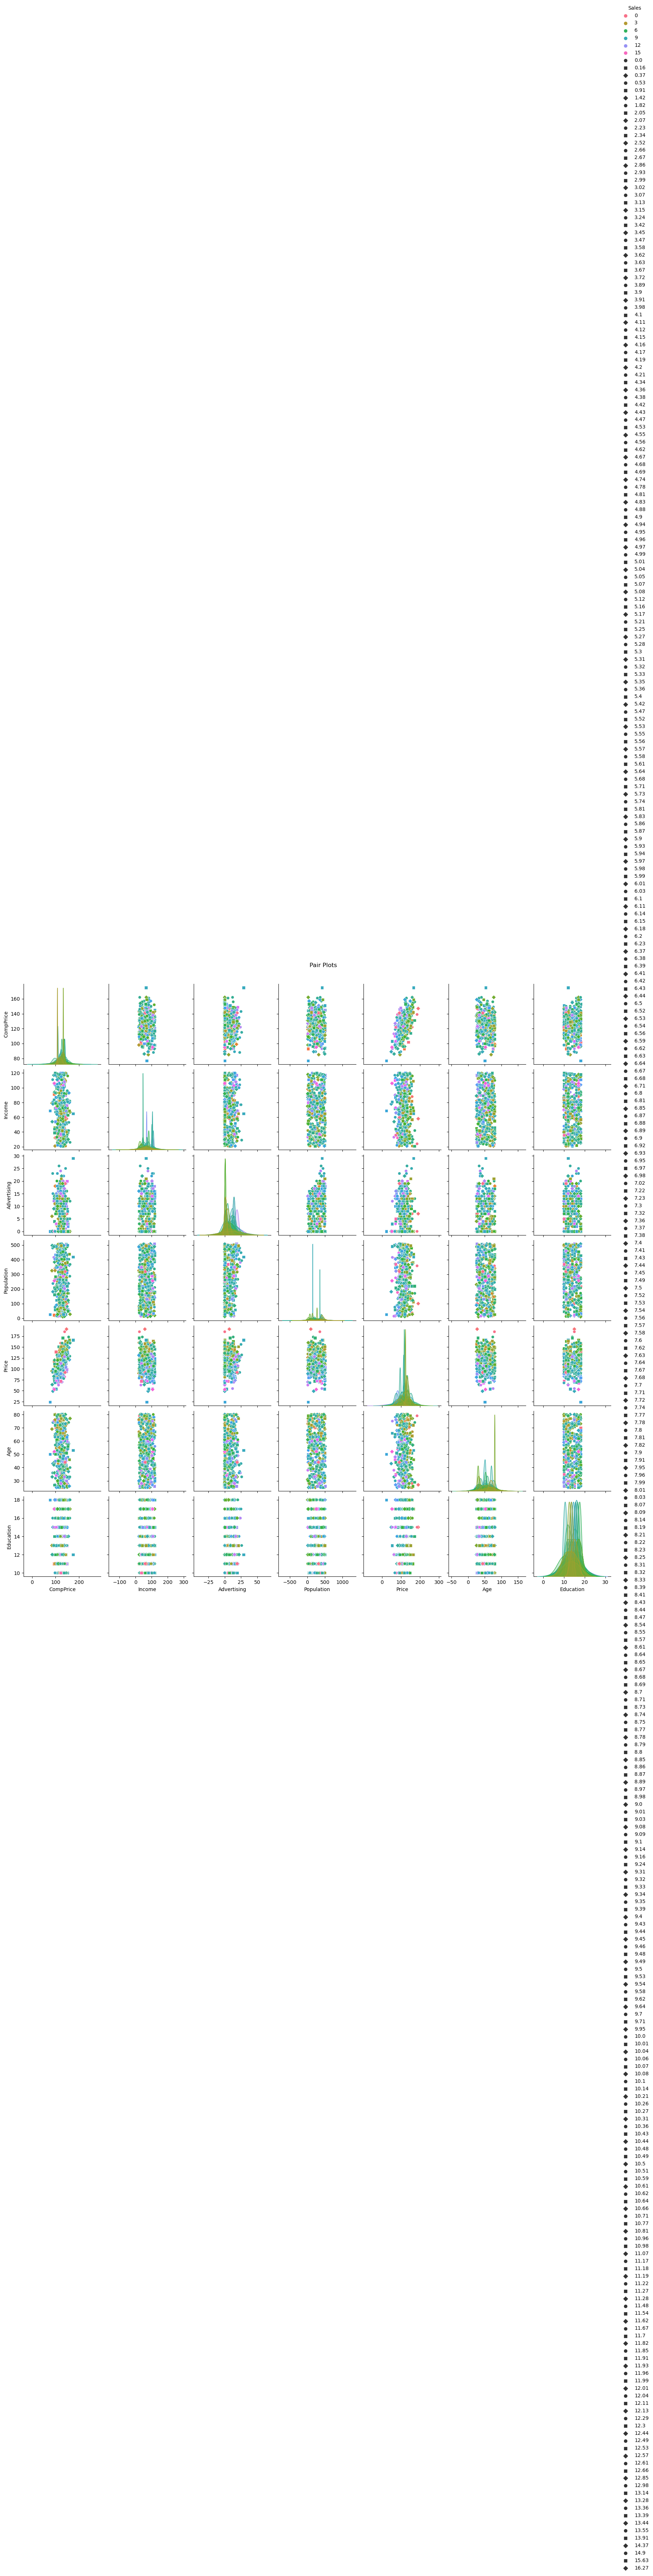

In [19]:
# Pair plots
sns.pairplot(df, hue="Sales", markers=["o", "s", "D"], palette="husl")
plt.suptitle("Pair Plots", y=1.02)
plt.show()

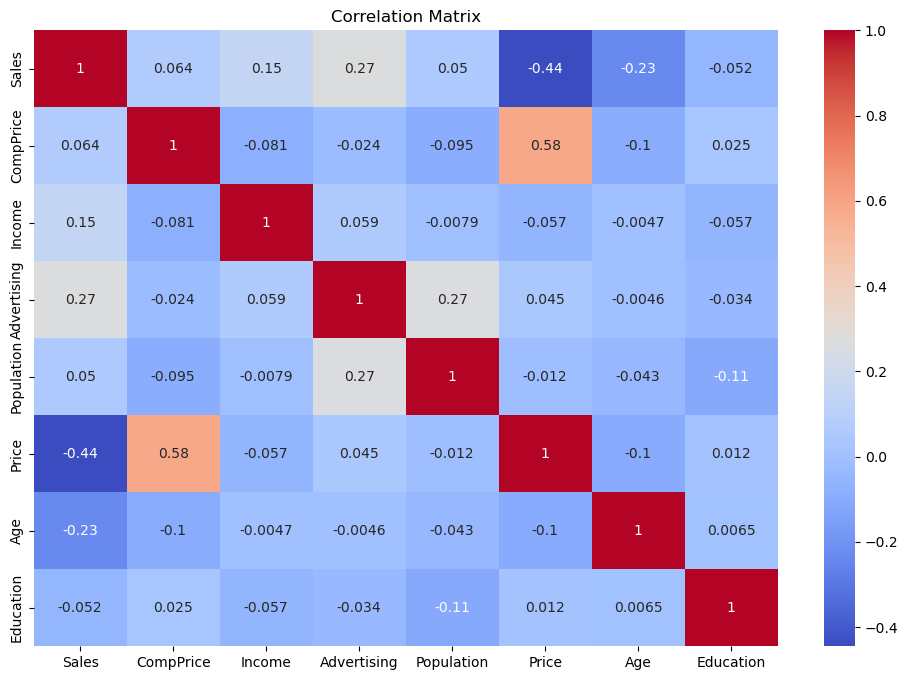

In [20]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Low Medium or Good for Sales')

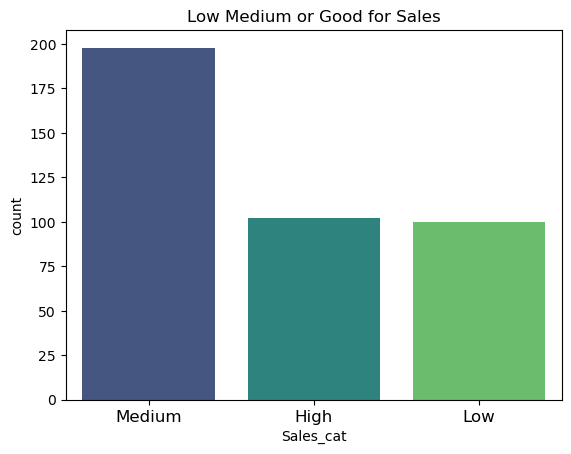

In [21]:
sns.countplot(x='Sales_cat', data=df1, palette = 'viridis', 
              order=df1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')

In [22]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [23]:
data_['Sales'] = df1.Sales_cat
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
le.fit(data_["Sales"])
data_["Sales"]=le.transform(data_["Sales"])
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [25]:
# split into input (X) and output (y) variables
X = data_.iloc[:, :-1]

y=  data_.Sales

In [29]:
# Standardization
SS = StandardScaler()
X_scaled = SS.fit_transform(X)

In [31]:
# Remove outliers using IQR method
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers = (X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR))
df_no_outliers = df[~outliers.any(axis=1)]

# Reset the index to ensure it is sequential
df_no_outliers.reset_index(drop=True, inplace=True)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
#data prtition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.30)

rf=RandomForestClassifier()
param_grid={'n_estimators':[10,50,100],'max_depth':[None,10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
grid_search=GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print('best hyper parameters:',grid_search.best_params_)

best hyper parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print('Accuracy on test data set:',format(accuracy))

Accuracy on test data set: 0.6428571428571429


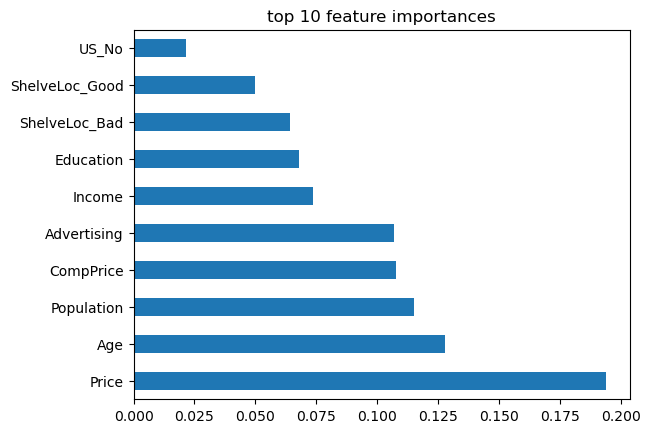

In [38]:
if hasattr(best_model,'feature_importances_'):
    feature_importances=pd.Series(best_model.feature_importances_,index=X_train.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('top 10 feature importances')
    plt.show()

In [40]:
#model fitting
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

# validation set approach
import numpy as np
from sklearn.metrics import mean_squared_error
training_error=[]
test_error=[]

for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train=DT.predict(X_train)
    Y_pred_test=DT.predict(X_test)
    training_error.append(mean_squared_error(Y_train,Y_pred_train))
    test_error.append(mean_squared_error(Y_test,Y_pred_test))
    
    
print("Avearge training error:",np.sqrt(training_error).round(3))
print("Avearge test error :",np.sqrt(test_error).round(3))

Avearge training error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Avearge test error : [1.    1.008 0.953 1.037 1.    1.008 0.97  0.944 1.033 0.975 1.068 0.917
 0.97  0.913 0.992 0.987 1.004 0.822 0.992 1.068 1.103 1.068 1.065 1.088
 1.008 0.966 0.917 1.133 0.871 0.861 1.    0.944 0.975 0.996 1.012 1.
 0.975 1.065 0.957 0.949 1.088 0.935 1.072 1.088 1.095 0.996 1.065 0.908
 1.147 0.785 1.088 1.033 0.992 1.118 0.97  1.049 0.935 1.061 1.092 1.008
 0.962 1.033 0.987 0.885 1.111 0.94  0.904 0.992 1.065 0.935 0.962 1.049
 0.837 1.037 0.894 0.966 1.033 1.076 1.088 0.957 0.935 1.065 0.957 1.049
 0.949 0.944 1.084 1.053 0.992 0.962 1.045 0.979 1.103 1.017 0.847 1.021
 1.072 0.957 0.953 1.004]


In [50]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100,max_samples=0.6,max_features=0.7)

training_error=[]
test_error=[]



for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    RFR.fit(X_train,Y_train)
    Y_pred_train=RFR.predict(X_train)
    Y_pred_test=RFR.predict(X_test)
    training_error.append(mean_squared_error(Y_train,Y_pred_train))
    test_error.append(mean_squared_error(Y_test,Y_pred_test))

import numpy as np
print("Avearge training error:",np.mean(training_error).round(3))
print("Avearge test error:",np.mean(test_error).round(3))
print("RFR - variance:",np.mean(training_error).round(3)-np.mean(test_error).round(3))

Avearge training error: 0.167
Avearge test error: 0.539
RFR - variance: -0.372


In [52]:
#we can also use the random forest classification
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train,Y_train)
y_pred=rf_classifier.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy score:',format(accuracy))

accuracy score: 0.6666666666666666


confusion matrix:


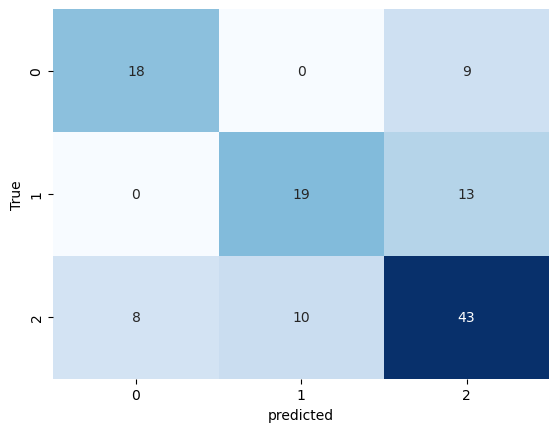

In [53]:
print('confusion matrix:')
conf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()